## Installing required libraries

In [22]:
# pip install catboost
# pip install xgboost
# pip install pandas
# pip install seaborn
# pip install numpy
# pip install matplotlib
# pip install scikit-learn

## Imports

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor

import warnings

warnings.filterwarnings('ignore')

## Data Reading

In [4]:
df = pd.read_csv('creditcard.csv')

## Data Analysis

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# check the missing value - Null
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
#check if there any duplication
df.duplicated().sum()

1081

In [13]:
# drop duplication data

df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

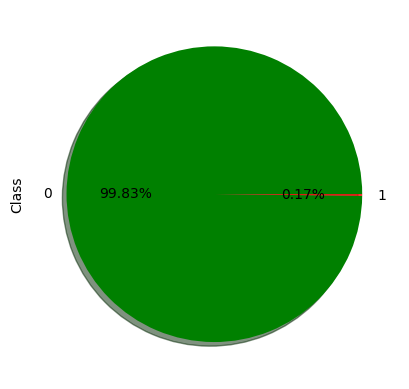

In [15]:
df["Class"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True ,colors=['green','red'])
plt.show()

## Data Processing

In [16]:
# Spliting the data into X and Y
X = df.drop(columns="Class")
y = df["Class"]

# Spliting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# checking shape of training and testing set
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 30)
X Test  :  (70932, 30)
Y Train :  (212794,)
Y Test  :  (70932,)


In [27]:
# Apply SMOTE for solving sampling problem
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Logistic Regression

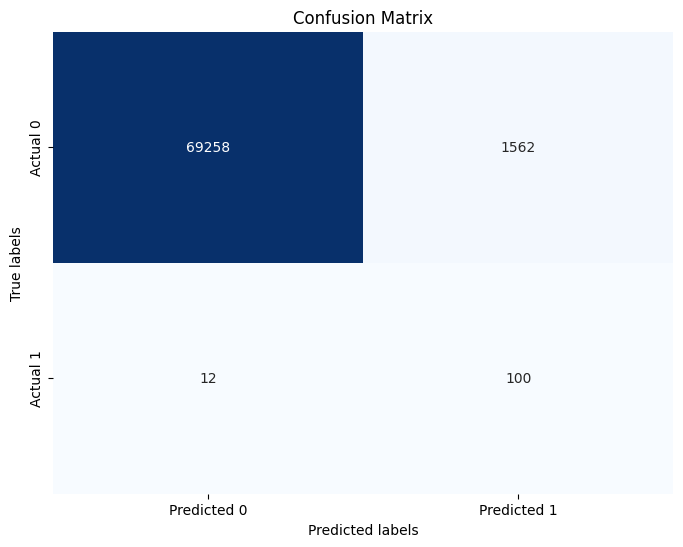

Accuracy Score: 0.9778097332656629
F1 Score :  0.5507519686772467


In [28]:
# Creating a Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
cf = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculating and printing the Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Calculating and printing the F1 Score
f1score_lr = f1_score(y_test, y_pred, average='macro')
print("F1 Score : ", f1score_lr)

## Grid Search with Logistic Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 0.001, 'penalty': 'l2'}


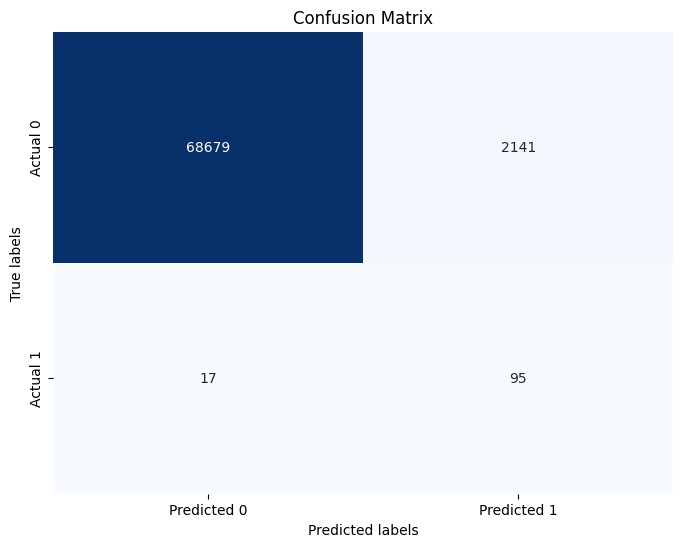

Accuracy Score: 0.9695764957987932
F1 Score: 0.5327260859433585


In [32]:
# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']                # Penalty term
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the logistic regression model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# F1 Score
f1score_lr = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1score_lr)

## Random Forest Classifier

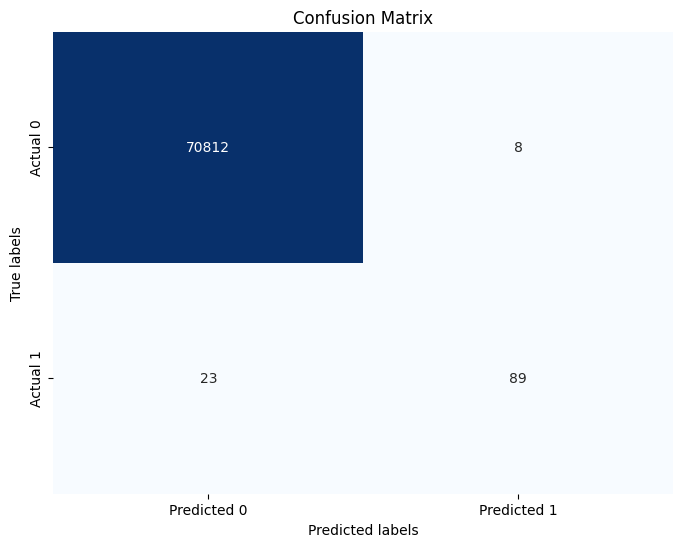

Accuracy Score: 0.9995629617098066
F1 Score :  0.925727899798334


In [33]:
# Defining the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Trainining the Random Forest classifier
random_forest_classifier.fit(X_resampled, y_resampled)

# Predictions on testing
y_pred = random_forest_classifier.predict(X_test)


# Model evaluation,confusion matrix
c = confusion_matrix(y_test, y_pred)


# Plot confusion matrix for random forest
plt.figure(figsize=(8, 6))
sns.heatmap(c, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))

f1score_rf = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1score_rf)

## Xgboosting Classifier

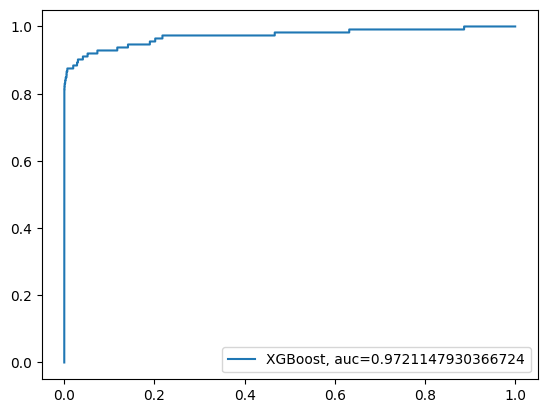

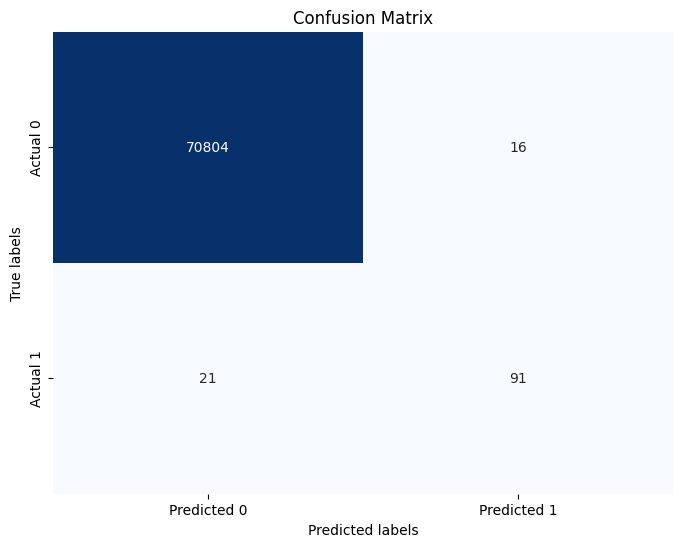

Accuracy Score :  0.9994783736536401
F1 Score :  0.9153945059445836


In [34]:
# Initializing the XGBoost model
xg = xgb.XGBClassifier()

# Training the XGBoost model
xg.fit(X_resampled, y_resampled)
y_pred = xg.predict(X_test)

# Calculating AUC Curve for XGBoost
y_pred_probability = xg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# Generating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculating and printing Accuracy score
acs = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', acs)

# Calculating and printing F1 Score
f1score_xg = f1_score(y_test, y_pred, average='macro')
print("F1 Score : ", f1score_xg)


## Catboosting Classifier

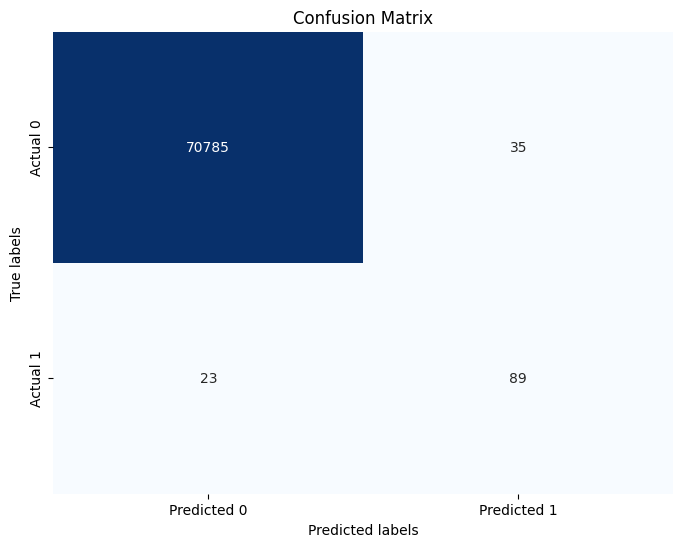

Accuracy = 0.9991823154570575
F1 Score :  0.8769138822975252


In [36]:
# Initialize CatBoost model
cb_model = CatBoostClassifier(iterations=100,
                              depth=12,
                              eval_metric='AUC',
                              random_seed=2018,
                              od_type='Iter',
                              metric_period=1,
                              od_wait=100)

# Make predictions using the CatBoost model
cb_predict = cb_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, cb_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy score
acc = accuracy_score(y_test, cb_predict)
print('Accuracy:', acc)

# Calculate F1 Score
f1score_cb = f1_score(y_test, cb_predict, average='macro')
print("F1 Score:", f1score_cb)

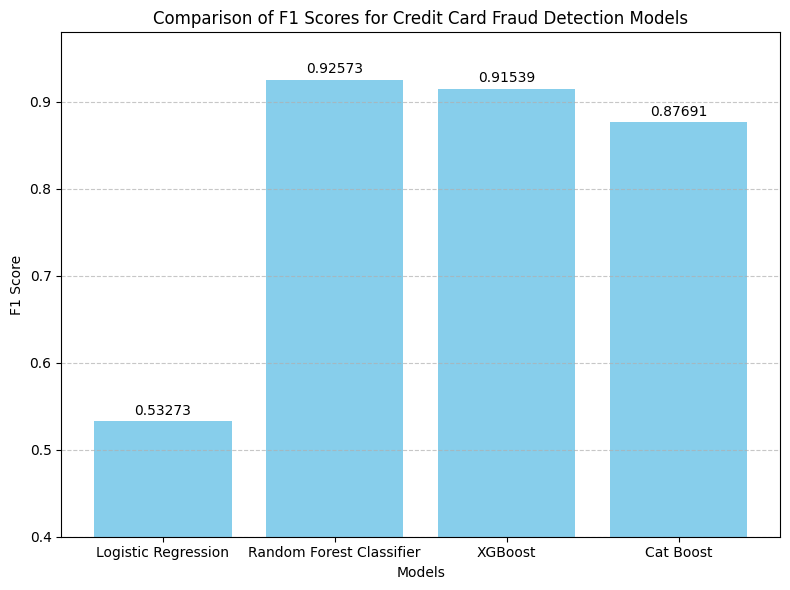

In [42]:
# Comparing F1 scores for each model

model_names = ['Logistic Regression', 'Random Forest Classifier', 'XGBoost', 'Cat Boost']
f1_scores = [ f1score_lr, f1score_rf, f1score_xg, f1score_cb]
#f1_scores = [0.9263647008994195, 0.9263647008994195, 0.9263647008994195, 0.908963849669453]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, f1_scores, color='skyblue')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Credit Card Fraud Detection Models')

# Adding the value of each F1 score on top of the bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height() + 0.02 , f'{score:.5f}',
             ha='center', va='top', color='black')

# Showing the plot
plt.ylim(0.40, 0.98)  # Adjust the limits of the y-axis if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()